In [52]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from scipy.stats import mode
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import shap

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data Loading

In [53]:
df = pd.read_csv('Binned Spectra/binned_raw_spectra.csv')

## Data Preprocessing

In [54]:
# Label Encoding
df['Serovar'] = LabelEncoder().fit_transform(df['Serovar'])

## Train-test split

In [55]:
train,test= train_test_split(df, test_size = 0.2, stratify=df['Serovar'])

In [56]:
X_train = train.iloc[:,:-1].values
X_test = test.iloc[:,:-1].values
y_train = train.iloc[:,-1].values
y_test = test.iloc[:,-1].values

## Model

In [57]:
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(X_train, y_train)

# make predictions for test set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.50%


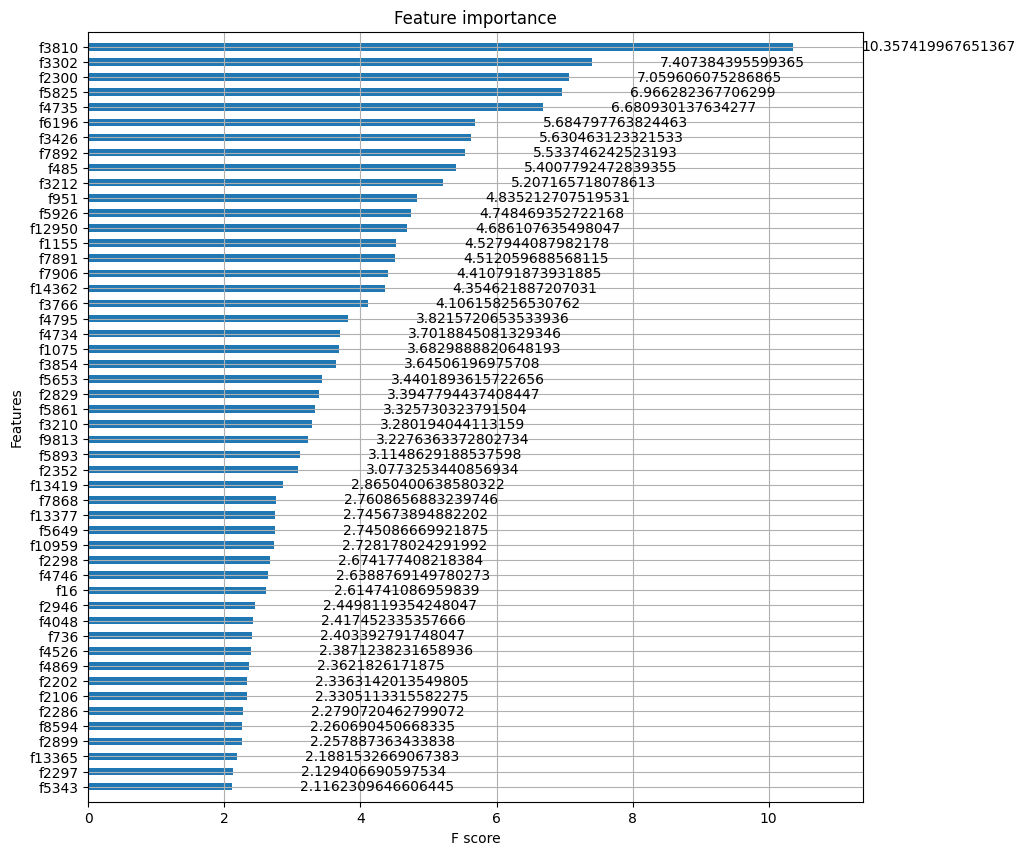

In [58]:
# plot feature importance
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(model, max_num_features=50, height=0.5, ax=ax, importance_type='gain')
pyplot.show()

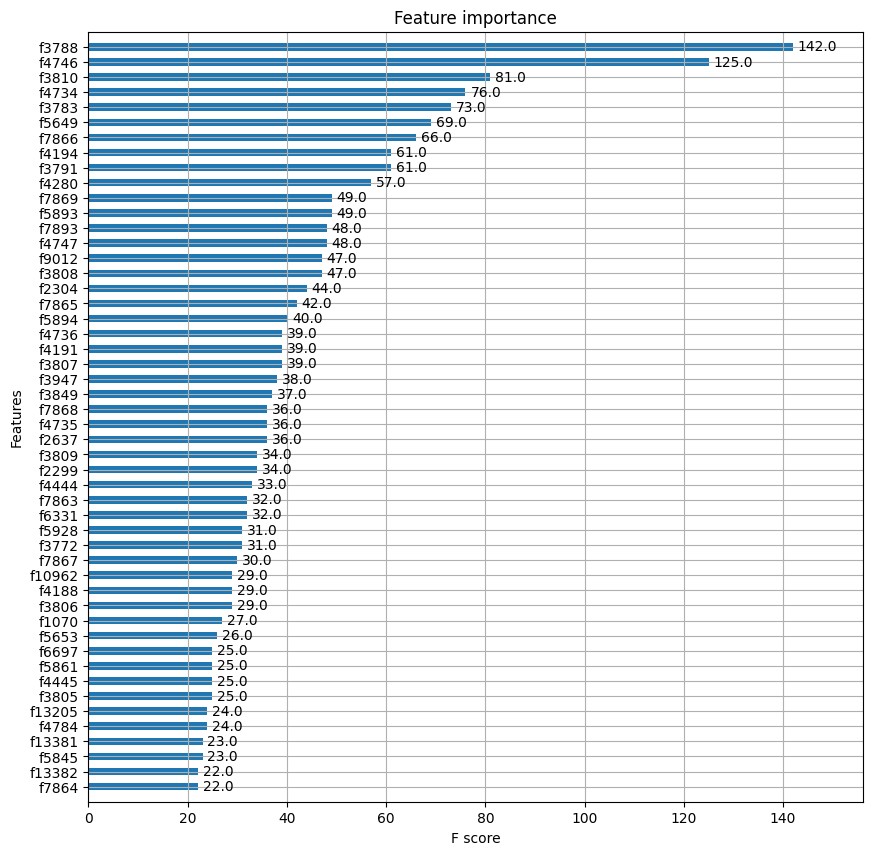

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(model, max_num_features=50, height=0.5, ax=ax, importance_type='weight')
pyplot.show()

[03:30:27] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


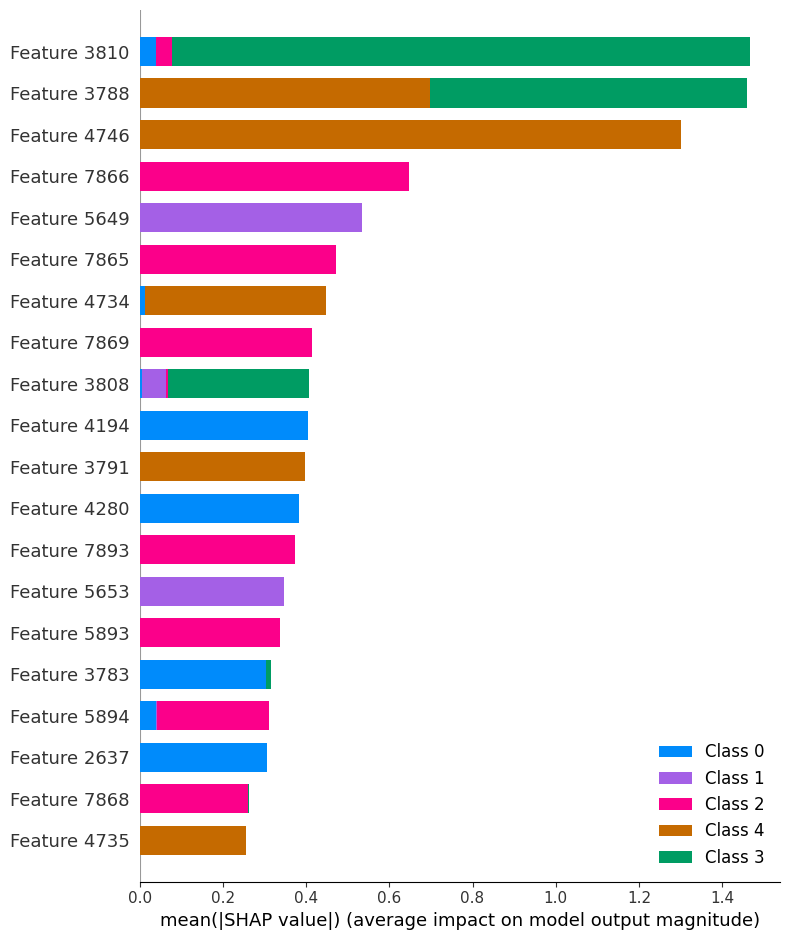

In [60]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [61]:
f_im = model.feature_importances_
f_im_with_index = [(x,f_im[x]) for x in range(len(f_im))]

In [62]:
top_50 = sorted(f_im_with_index, reverse=True, key=lambda x: x[1])[:50]
top_50_index = [x[0] for x in top_50]

In [63]:
spectra = df.drop(columns=['Serovar'])
spectra.columns = spectra.columns.astype(float)

In [64]:
sample_index = 0
sample1 = spectra.iloc[sample_index,:]

In [65]:
sample1.index

Index([ 2005.6,  2006.6,  2007.6,  2008.6,  2009.6,  2010.6,  2011.6,  2012.6,
        2013.6,  2014.6,
       ...
       19938.6, 19940.1, 19941.7, 19943.2, 19944.8, 19946.4, 19948.1, 19949.6,
       19951.2, 19952.7],
      dtype='float64', length=14376)

In [66]:
top_50_index = [list(sample1.index)[x[0]] for x in top_50]

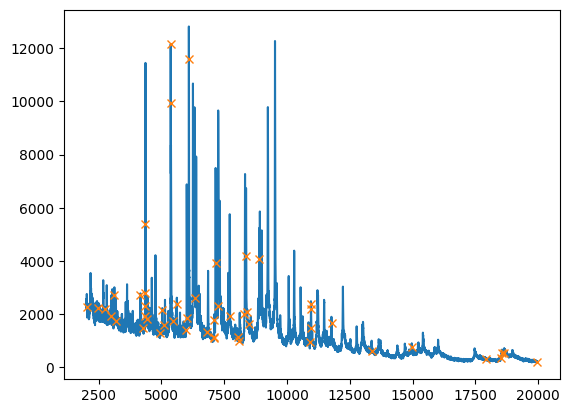

In [67]:
plt.plot(sample1)
plt.plot(top_50_index, sample1[top_50_index], "x")
plt.show()

Text(0, 0.5, 'Intensity')

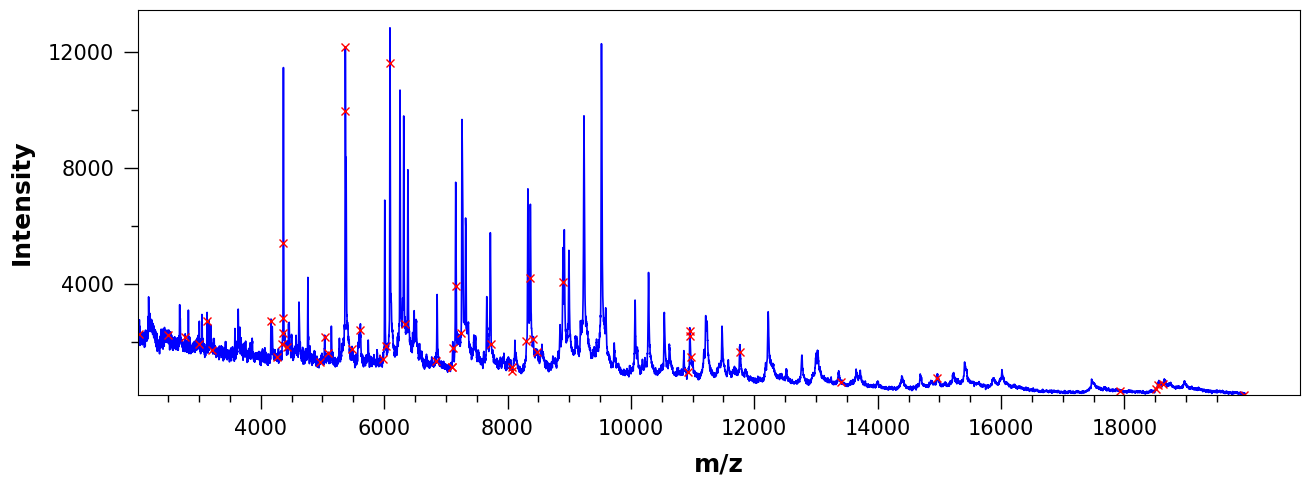

In [68]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()
ax.plot(sample1.index, sample1.values, linewidth=1.2,c='b')
ax.plot(top_50_index, sample1[top_50_index], "x", c='r')
ax.tick_params(axis='x', labelsize=15, which='major', pad=7)
ax.tick_params(axis='y', labelsize=15, which='major', pad=7)
ax.tick_params(axis='x', length = 10, width = 1)
ax.tick_params(axis='x', which = 'minor', length = 5, width = 1)
ax.tick_params(axis='y', length = 10, width = 1)
ax.tick_params(axis='y', which = 'minor', length = 5, width = 1)
ax.set_xticks(np.arange(min((sample1.index//1000)*1000),max((sample1.index+1000)//1000*1000),2000))
ax.set_xticks(np.arange(min((sample1.index//1000)*1000),max((sample1.index+1000)//1000*1000),500), minor=True)
ax.set_yticks(np.arange(min((sample1.values//1000)*1000),max((sample1.values+1000)//1000*1000),4000))
ax.set_yticks(np.arange(min((sample1.values//1000)*1000),max((sample1.values)//1000*1000),2000), minor=True)
ax.set_xlim(min(sample1.index),)
ax.set_ylim(min(sample1.values),)
ax.set_xlabel('m/z',fontsize=18, fontweight='bold',labelpad = 10)
ax.set_ylabel('Intensity',fontsize=18, fontweight='bold',labelpad = 10)
#ax.text(.8, .9, 'S. '+sample_srv, ha='right', va='top', transform=ax.transAxes, fontsize=25)